In [1]:
# CIFAR-10으로 컨볼루션 신경망을 학습하고 모델을 파일에 저장하기

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn_for_deploy.h5")

C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  RequestsDependencyWarning)


Epoch 1/100
391/391 - 87s - loss: 1.6645 - accuracy: 0.3835 - val_loss: 1.3207 - val_accuracy: 0.5163 - 87s/epoch - 222ms/step
Epoch 2/100
391/391 - 81s - loss: 1.2826 - accuracy: 0.5399 - val_loss: 1.1014 - val_accuracy: 0.6098 - 81s/epoch - 208ms/step
Epoch 3/100
391/391 - 77s - loss: 1.1218 - accuracy: 0.6017 - val_loss: 1.0665 - val_accuracy: 0.6210 - 77s/epoch - 197ms/step
Epoch 4/100


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  RequestsDependencyWarning)


1/1 [==============================] - 0s 143ms/step


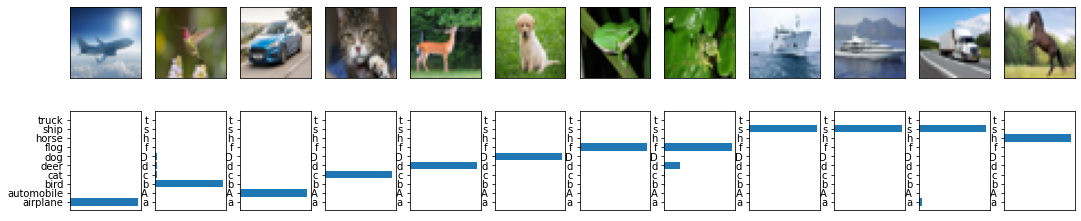

In [1]:
# 폴더에 담겨 있는 영상을 인식

import numpy as np
import tensorflow as tf
from PIL import Image
import os

cnn=tf.keras.models.load_model("my_cnn_for_deploy.h5") # 학습된 모델 불러오기
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck'] # CIFAR-10의 부류 이름

x_test=[]
for filename in os.listdir("./test_images"): # 폴더에서 테스트 영상 읽기
    if 'jpg' not in filename:
        continue
    img=Image.open("./test_images/"+filename)
    x=np.asarray(img.resize([32,32]))/255.0
    x_test.append(x)
x_test=np.asarray(x_test)

pred=cnn.predict(x_test) # 예측

import matplotlib.pyplot as plt

n=len(x_test)
plt.figure(figsize=(18,4))

for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(x_test[i])
    plt.xticks([]);plt.yticks([])
    plt.subplot(2,n,n+i+1)
    if i==0:
        plt.barh(class_names,pred[i])
    else:
        plt.barh(['a','A','b','c','d','D','f','h','s','t'],pred[i])
    plt.xticks([])

In [1]:
# 영상 장바구니 담기 - 부류에 따라 영상을 폴더에 담기

import numpy as np
import tensorflow as tf
from PIL import Image
import os

cnn=tf.keras.models.load_model('my_cnn_for_deploy.h5') # 학습된 모델 불러오기
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck'] # CIFAR-10의 부류 이름

x_test=[]
img_orig=[]
fname=[]
for filename in os.listdir('./test_images'): # 폴더에서 테스트 영상 읽기
    if 'jpg' not in filename:
        continue
    img=Image.open('./test_images/'+filename)
    img_orig.append(img)
    fname.append(filename)
    x=np.asarray(img.resize([32,32]))/255.0
    x_test.append(x)
x_test=np.asarray(x_test)

pred=cnn.predict(x_test) # 예측

os.chdir('./test_images')
if not os.path.isdir('class_buckets'):
    os.mkdir('class_buckets')
os.chdir('class_buckets')
for i in range(len(class_names)): # 부류별로 폴더 만들기
    if not os.path.isdir(class_names[i]):
        os.mkdir(class_names[i])

for i in range(len(x_test)): # 인식 결과에 따라 폴더에 저장
    folder_name=class_names[np.argmax(pred[i])]
    os.chdir(folder_name)
    img_orig[i].save(fname[i])
    os.chdir('..')

C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  RequestsDependencyWarning)


1/1 [==============================] - 0s 208ms/step
